In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
redwine = pd.read_csv('https://archive.ics.uci.edu'
                      '/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = redwine.iloc[:, :-1];
y = redwine.iloc[:, -1]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

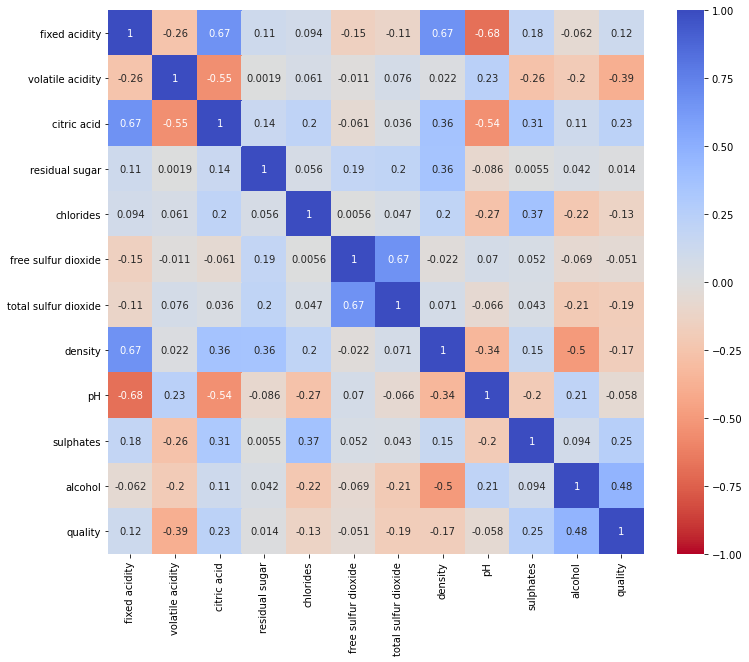

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(redwine.corr(), annot=True, 
            vmin=-1, vmax=1, cmap="coolwarm_r")
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [7]:
pred = rf_model.predict(test_X)

In [8]:
import pandas as pd
pd.crosstab(test_y, pred)

col_0,3,4,5,6,7,8
quality,,,,,,
3,0,0,2,0,0,0
4,1,0,12,8,0,0
5,0,0,161,46,0,0
6,0,1,60,122,12,0
7,0,0,7,18,27,0
8,0,0,0,0,2,1


In [9]:
rf_model.score(test_X, test_y)

0.6479166666666667

In [10]:
rf_model.feature_importances_

array([0.07679351, 0.10421786, 0.07802557, 0.06573503, 0.07706915,
       0.06138852, 0.10841369, 0.09313385, 0.07038339, 0.10917441,
       0.15566503])

In [11]:
import numpy as np
features = pd.DataFrame(data=np.c_[X.columns,
                                   rf_model.feature_importances_],
                        columns=["feature", "importance"])

In [12]:
features.sort_values(by="importance", ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.155665
1,sulphates,0.109174
2,total sulfur dioxide,0.108414
3,volatile acidity,0.104218
4,density,0.093134
5,citric acid,0.078026
6,chlorides,0.077069
7,fixed acidity,0.076794
8,pH,0.070383
9,residual sugar,0.065735


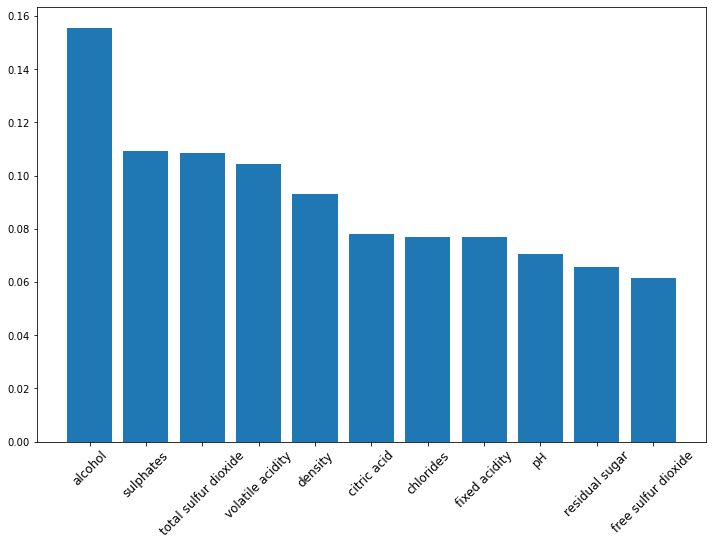

In [13]:
plt.figure(figsize=(12, 8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

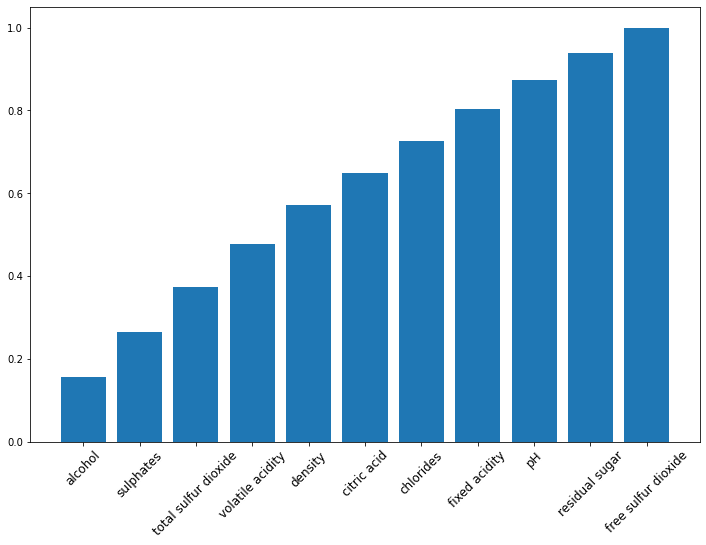

In [14]:
y_stack = np.cumsum(features.importance, axis=0)
plt.figure(figsize=(12, 8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rfe_model = RFE(rf_model, n_features_to_select=5)
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [16]:
import numpy as np
import pandas as pd
features_rfe = pd.DataFrame(data=np.c_[X.columns.values, 
                                       rfe_model.get_support()],
                            columns=["feature", "selected"])
features_rfe.sort_values(by="selected", ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
8,pH,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False
